# KAN Layer Depth Analysis

According to Kolmogrov-Arnold theorem, a 2-layer KAN with (2n+1)-width is sufficient to represent n-variable continuous functions. However, a KAN with deeper layer architecture could be more advantageous for function approximation. In this chapter, two-layer and three-layer KANs are comparatively applied to approximate the target function: $f(x_1,x_2,x_3,x_4)={\rm exp}({\rm sin}(x_1^2+x_2^2)+{\rm sin}(x_3^2+x_4^2))$.

### Initial Environment Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from kan import KAN, create_dataset

# target function
f = lambda x: torch.exp((torch.sin(torch.pi*(x[:,[0]]**2+x[:,[1]]**2))+torch.sin(torch.pi*(x[:,[2]]**2+x[:,[3]]**2)))/2)

# create dataset
dataset = create_dataset(f, n_var=4, train_num=5000)

# grid refinement
grids = np.array([3,5,10,20,50])

### Two-layer KAN with node widths [4,9,1]

In [2]:
two_layer_train_rmse = []
two_layer_test_rmse = []

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,9,1], grid=3, k=3, seed=0, noise_scale=1.0)
    else:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20)
    two_layer_train_rmse.append(results['train_loss'][-1].item())
    two_layer_test_rmse.append(results['test_loss'][-1].item())

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.86e-02 | test_loss: 2.84e-02 | reg: 2.79e+01 | : 100%|█| 50/50 [00:41<00:00,  1.21it


saving model version 0.1
saving model version 0.2


| train_loss: 1.28e-02 | test_loss: 1.39e-02 | reg: 2.96e+01 | : 100%|█| 50/50 [00:50<00:00,  1.01s/


saving model version 0.3
saving model version 0.4


| train_loss: 8.56e-03 | test_loss: 9.26e-03 | reg: 2.99e+01 | : 100%|█| 50/50 [01:02<00:00,  1.25s/


saving model version 0.5
saving model version 0.6


| train_loss: 7.33e-03 | test_loss: 8.49e-03 | reg: 2.98e+01 | : 100%|█| 50/50 [01:23<00:00,  1.67s/


saving model version 0.7
saving model version 0.8


| train_loss: 1.01e-02 | test_loss: 1.69e-02 | reg: 2.95e+01 | : 100%|█| 50/50 [02:14<00:00,  2.69s/

saving model version 0.9


### Three-layer KAN with node widths [4,2,1,1]

In [5]:
three_layer_train_rmse = []
three_layer_test_rmse = []

for i in range(grids.shape[0]):
    if i == 0:
        model = KAN(width=[4,2,1,1], grid=3, k=3, seed=0, noise_scale=1.0)
    else:
        model = model.refine(grids[i])
    results = model.fit(dataset, opt="LBFGS", steps=50, stop_grid_update_step=20)
    three_layer_train_rmse.append(results['train_loss'][-1].item())
    three_layer_test_rmse.append(results['test_loss'][-1].item())

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 5.01e-03 | test_loss: 5.09e-03 | reg: 1.03e+01 | : 100%|█| 50/50 [00:22<00:00,  2.24it


saving model version 0.1
saving model version 0.2


| train_loss: 3.02e-03 | test_loss: 3.09e-03 | reg: 1.03e+01 | : 100%|█| 50/50 [00:22<00:00,  2.25it


saving model version 0.3
saving model version 0.4


| train_loss: 1.63e-03 | test_loss: 1.65e-03 | reg: 1.03e+01 | : 100%|█| 50/50 [00:35<00:00,  1.43it


saving model version 0.5
saving model version 0.6


| train_loss: 4.20e-04 | test_loss: 3.91e-04 | reg: 1.03e+01 | : 100%|█| 50/50 [00:38<00:00,  1.31it


saving model version 0.7
saving model version 0.8


| train_loss: 7.48e-05 | test_loss: 7.57e-05 | reg: 1.03e+01 | : 100%|█| 50/50 [01:15<00:00,  1.50s/

saving model version 0.9


### Comparison of Training and Testing RMSE

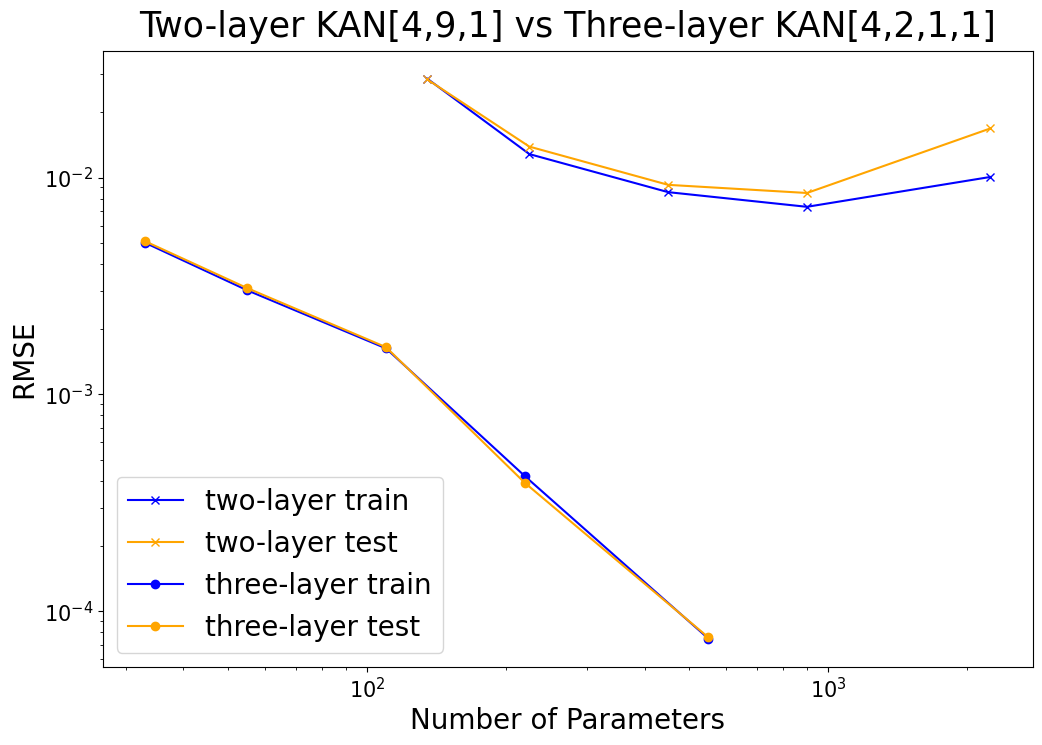

In [6]:
plt.figure(figsize=(12, 8))

two_layer_n_params = np.array(grids) * (4*9+9*1)
plt.plot(two_layer_n_params, two_layer_train_rmse, marker="x", color='blue')
plt.plot(two_layer_n_params, two_layer_test_rmse, marker="x", color='orange')

three_layer_n_params = np.array(grids) * (4*2+2*1+1*1)
plt.plot(three_layer_n_params, three_layer_train_rmse, marker="o", color='blue')
plt.plot(three_layer_n_params, three_layer_test_rmse, marker="o", color='orange')

plt.legend(['two-layer train', 'two-layer test', 'three-layer train', 'three-layer test'], loc="lower left", fontsize=20)
plt.title('Two-layer KAN[4,9,1] vs Three-layer KAN[4,2,1,1]', fontsize=25, pad=10)
plt.xlabel('Number of Parameters', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.xscale('log')
plt.yscale('log')